# Iteration 2: Image Classification, Autoencoders & Clustering

# Image Classification

### Classification using SVM

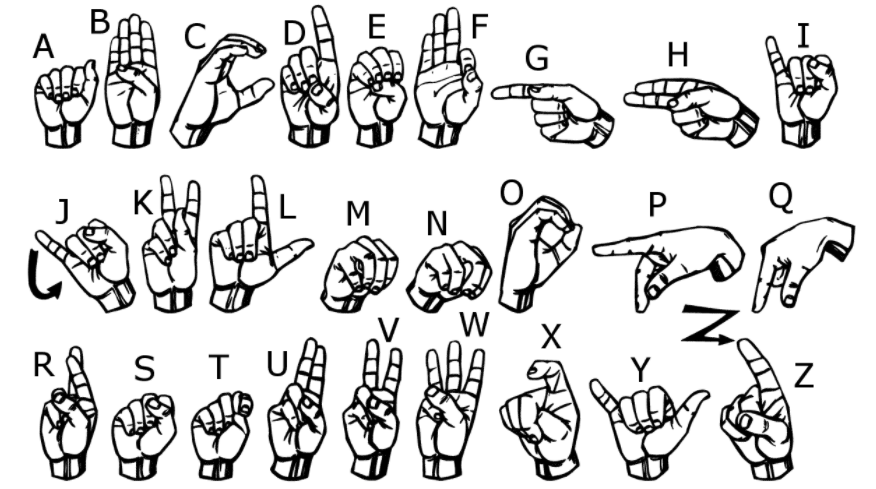

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# Load data
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_data.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
train_data.shape

(27455, 785)

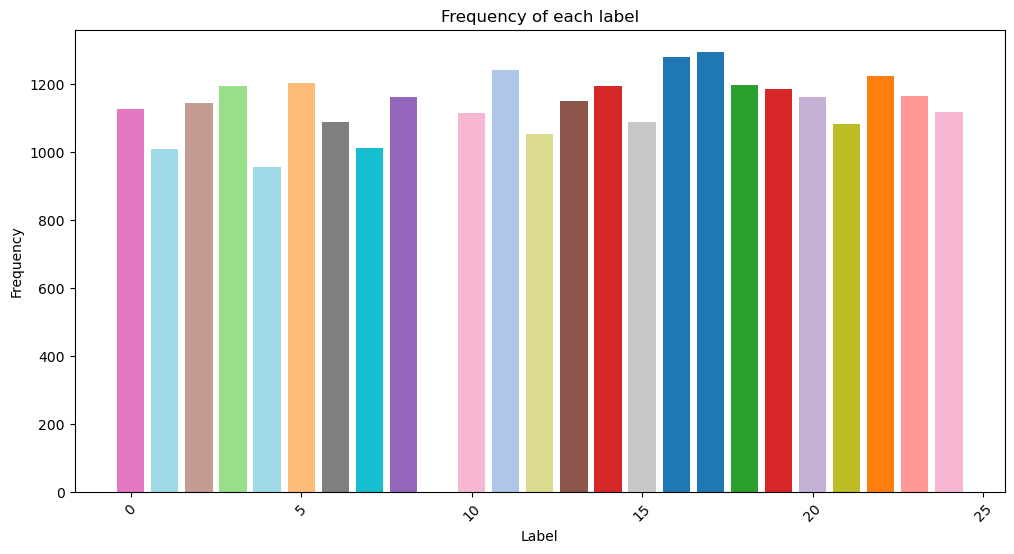

In [6]:
# Get the frequency of each label
label_counts = train_data['label'].value_counts()

# Sort the labels based on their frequencies
sorted_labels = label_counts.index

# Define a color palette with enough colors for each label
num_labels = len(sorted_labels)
color_palette = plt.cm.tab20(np.linspace(0, 1, num_labels))

# Plotting the counts of each label with different colors
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_labels, label_counts, color=color_palette)

# Adding labels
plt.title("Frequency of each label")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.show()

In [7]:
# Separating features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [8]:
# Normalizing features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [9]:
#Dimensionality reduction: PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [10]:
# Model Build
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_pca, y_train)

SVC(C=10)

In [11]:
#Model Evaluation
y_pred = svm_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8696319018404908


In [12]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       331
           1       1.00      1.00      1.00       432
           2       0.84      1.00      0.91       310
           3       0.98      1.00      0.99       245
           4       0.95      1.00      0.98       498
           5       0.80      0.92      0.86       247
           6       0.93      0.94      0.94       348
           7       0.99      0.95      0.97       436
           8       0.82      0.85      0.83       288
          10       0.87      0.75      0.80       331
          11       0.94      0.92      0.93       209
          12       0.88      0.79      0.83       394
          13       0.90      0.66      0.76       291
          14       0.90      0.90      0.90       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.34      0.55      0.42       144
    

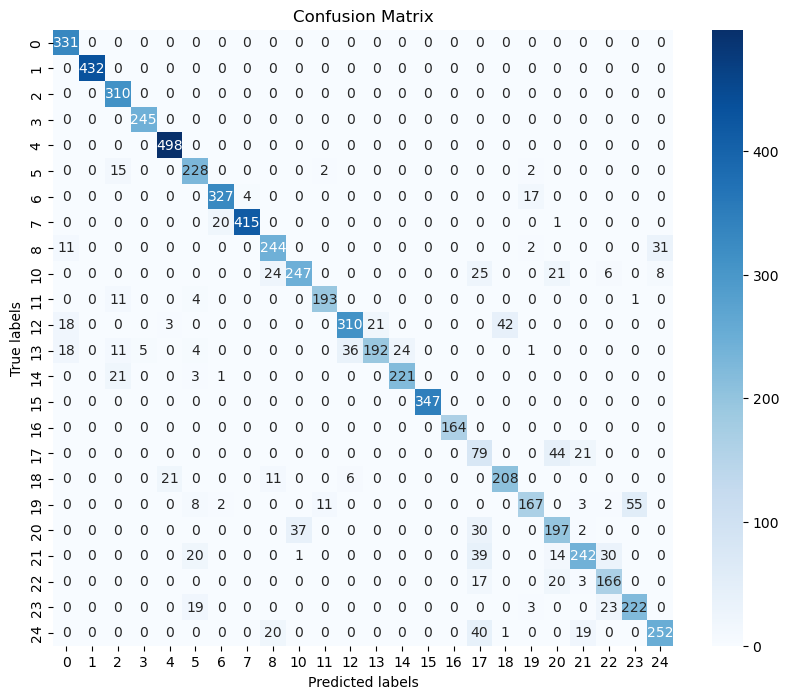

In [13]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[label for label in range(26) if label not in [9, 25]], 
            yticklabels=[label for label in range(26) if label not in [9, 25]])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## CNN

In [14]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [15]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(25, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                        

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
429/429 [==============================] - 77s 162ms/step - loss: 1.1421 - accuracy: 0.6421 - val_loss: 0.2232 - val_accuracy: 0.9159
Epoch 2/10
429/429 [==============================] - 69s 161ms/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 0.2043 - val_accuracy: 0.9424
Epoch 3/10
429/429 [==============================] - 69s 162ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.1589 - val_accuracy: 0.9578
Epoch 4/10
429/429 [==============================] - 71s 165ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.2117 - val_accuracy: 0.9459
Epoch 5/10
429/429 [==============================] - 69s 162ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.1830 - val_accuracy: 0.9572
Epoch 6/10
429/429 [==============================] - 70s 163ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.1734 - val_accuracy: 0.9576
Epoch 7/10
429/429 [==============================] - 74s 173ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.1496 - val_ac

In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

225/225 [==============================] - 3s 15ms/step - loss: 0.1565 - accuracy: 0.9686
Test Loss: 0.156533882021904
Test Accuracy: 0.9686279892921448


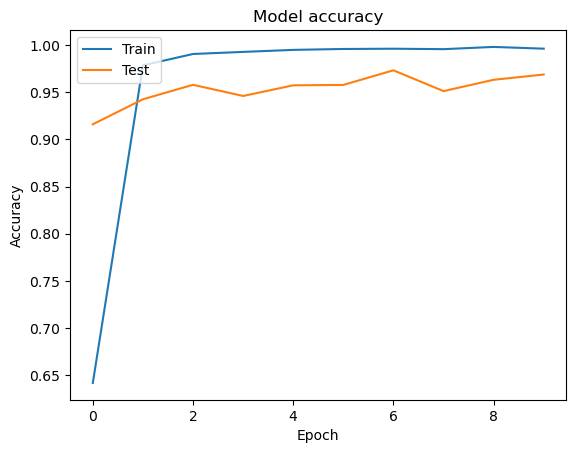

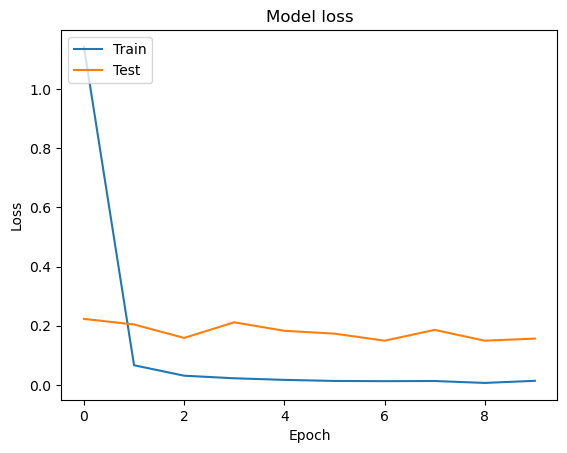

In [21]:
#training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 37ms/step


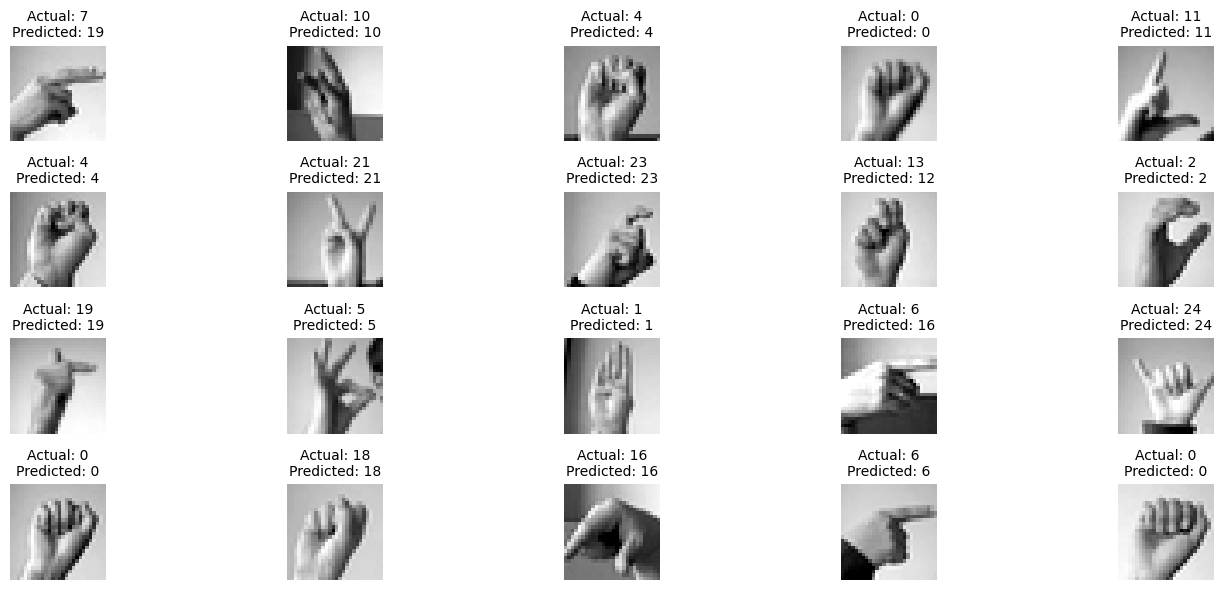

In [23]:
# Testing on random samples 
sample_size = 20
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

sample_predictions = model.predict(sample_images)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

plt.figure(figsize=(15, 6))
for i in range(sample_size):
    plt.subplot(4, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {sample_labels[i]}\nPredicted: {sample_predicted_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Autoencoders

In [13]:
# Autoencoder architecture
input_img = tf.keras.Input(shape=(28, 28, 1))

In [14]:
# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [15]:
from keras.models import Model

encoder = Model(input_img, encoded)

encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [16]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [17]:
decoder = Model(input_img, decoded)

decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [18]:
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
# Training the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
215/215 [==============================] - 25s 96ms/step - loss: 0.6288 - val_loss: 0.6025
Epoch 2/10
215/215 [==============================] - 21s 95ms/step - loss: 0.6045 - val_loss: 0.5988
Epoch 3/10
215/215 [==============================] - 20s 93ms/step - loss: 0.6018 - val_loss: 0.5968
Epoch 4/10
215/215 [==============================] - 21s 97ms/step - loss: 0.6002 - val_loss: 0.5953
Epoch 5/10
215/215 [==============================] - 21s 96ms/step - loss: 0.5991 - val_loss: 0.5945
Epoch 6/10
215/215 [==============================] - 20s 91ms/step - loss: 0.5983 - val_loss: 0.5939
Epoch 7/10
215/215 [==============================] - 20s 95ms/step - loss: 0.5976 - val_loss: 0.5938
Epoch 8/10
215/215 [==============================] - 21s 96ms/step - loss: 0.5972 - val_loss: 0.5926
Epoch 9/10
215/215 [==============================] - 20s 92ms/step - loss: 0.5967 - val_loss: 0.5922
Epoch 10/10
215/215 [==============================] - 20s 92ms/step - loss: 0.596

In [20]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

225/225 [==============================] - 3s 11ms/step


In [24]:
from random import randint

def reconstruct_img(model, images, n_imgs):
    
    random_int = randint(0, images.shape[0] - n_imgs)
    
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index], cmap='Greys')
        
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index], cmap='Greys')

1/1 [==============================] - 0s 33ms/step


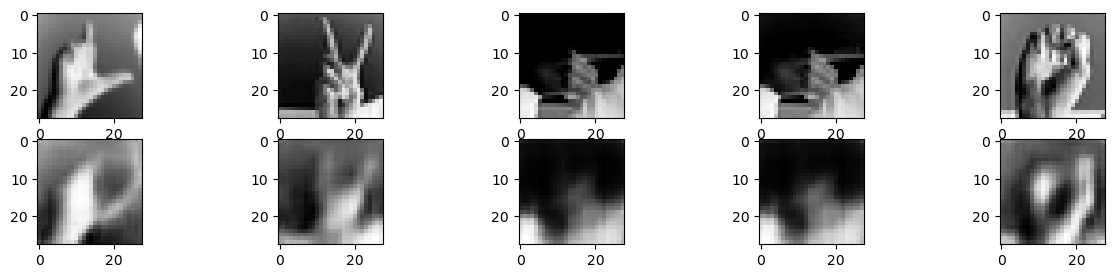

In [25]:
reconstruct_img(autoencoder, X_test, 5)

In [31]:
# Encoder 2
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
encoded2 = layers.MaxPooling2D((2, 2), padding='same')(x)

In [32]:
encoder2 = Model(input_img, encoded2)

encoder2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 64)        256 

In [33]:
# Decoder 2
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)
decoded2 = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [34]:
decoder2 = Model(input_img, decoded2)

decoder2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256 

In [39]:
# Compile
autoencoder2 = Model(input_img, decoded2)

learning_rate = 0.001
autoencoder2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy')

In [40]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [41]:
history = autoencoder2.fit(X_train, X_train,
                          epochs=30,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          callbacks=[early_stopping])


Epoch 1/30
215/215 [==============================] - 60s 268ms/step - loss: 0.6013 - val_loss: 0.6578
Epoch 2/30
215/215 [==============================] - 57s 265ms/step - loss: 0.5874 - val_loss: 0.6186
Epoch 3/30
215/215 [==============================] - 57s 266ms/step - loss: 0.5855 - val_loss: 0.5852
Epoch 4/30
215/215 [==============================] - 57s 267ms/step - loss: 0.5844 - val_loss: 0.5799
Epoch 5/30
215/215 [==============================] - 58s 268ms/step - loss: 0.5837 - val_loss: 0.5793
Epoch 6/30
215/215 [==============================] - 56s 261ms/step - loss: 0.5831 - val_loss: 0.5796
Epoch 7/30
215/215 [==============================] - 56s 260ms/step - loss: 0.5828 - val_loss: 0.5783
Epoch 8/30
215/215 [==============================] - 56s 261ms/step - loss: 0.5825 - val_loss: 0.5799
Epoch 9/30
215/215 [==============================] - 56s 261ms/step - loss: 0.5821 - val_loss: 0.5780
Epoch 10/30
215/215 [==============================] - 56s 261ms/step - l

1/1 [==============================] - 0s 22ms/step


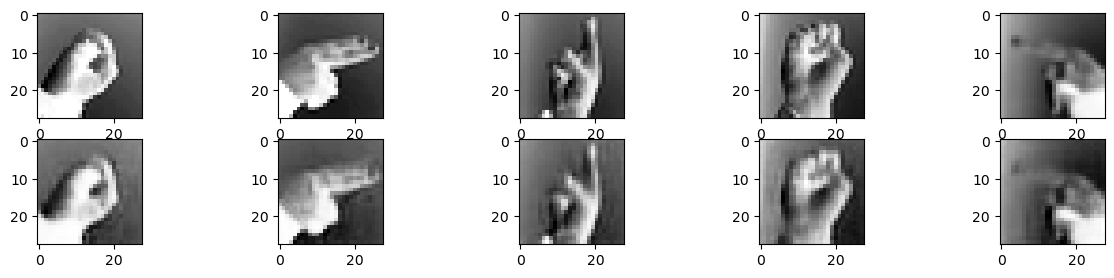

In [43]:
reconstruct_img(autoencoder2, X_test, 5)

# Clustering

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [26]:
df.shape

(344, 5)

In [27]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [28]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.sex.value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

In [32]:
df.drop(df[df['sex']=='.'].index, inplace = True)
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

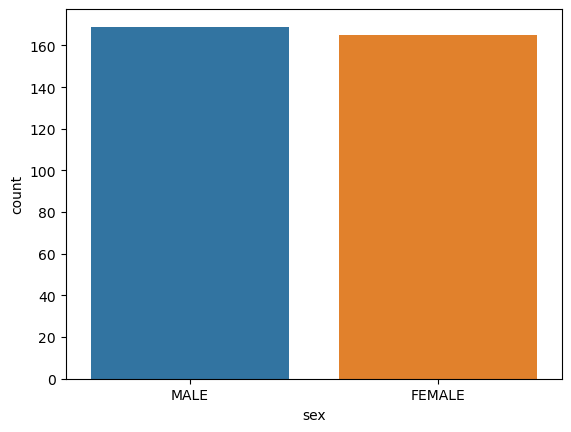

In [33]:
# countplot for sex column
sns.countplot(data=df, x='sex')

plt.show()

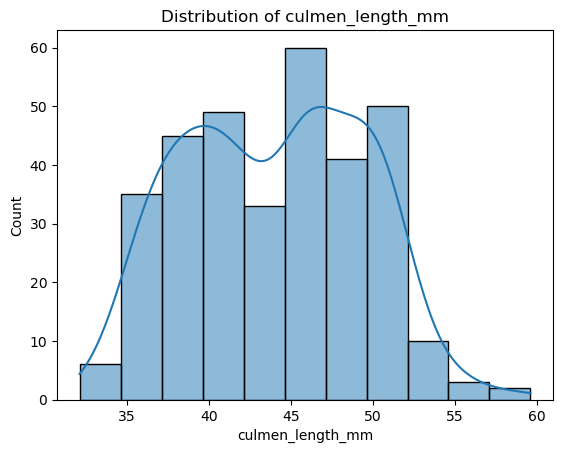

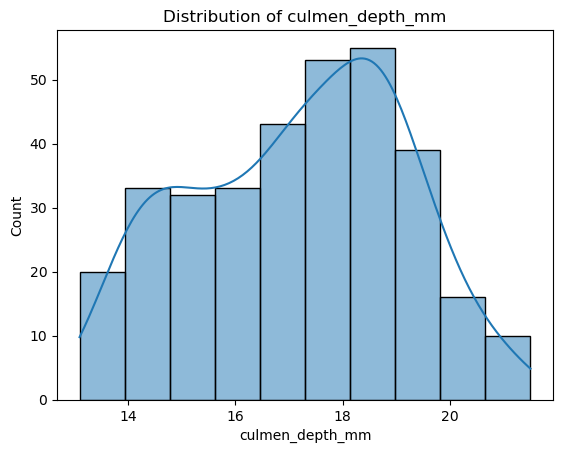

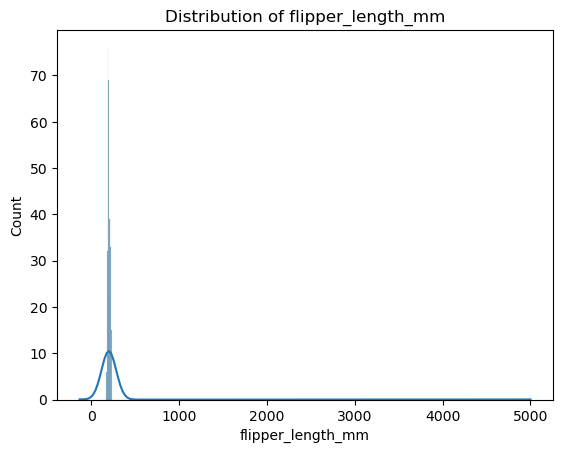

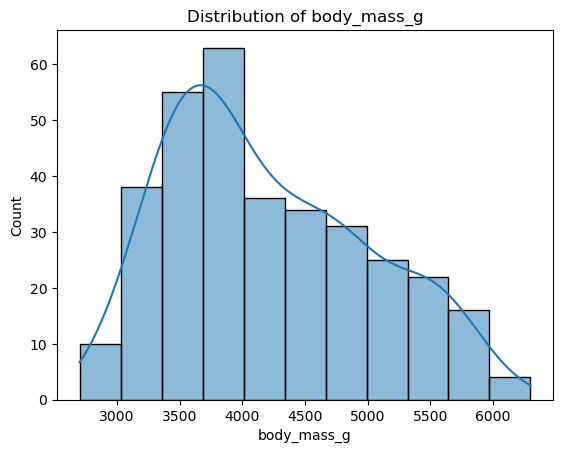

In [34]:
for column in df.select_dtypes(include=['float64']).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_5164\3852328347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


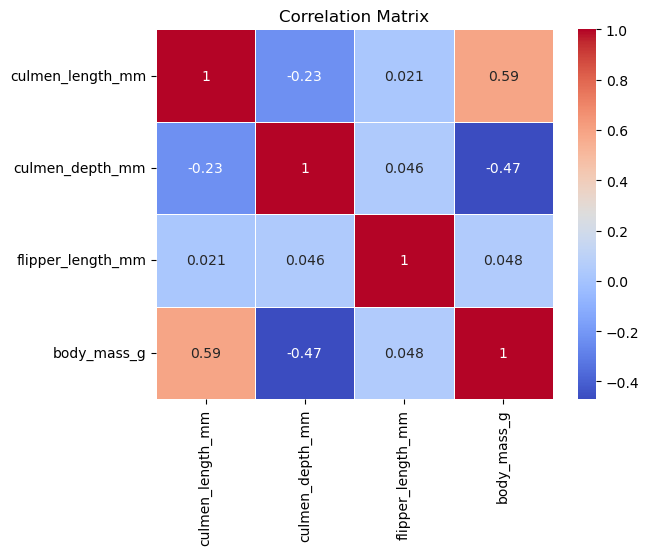

In [35]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

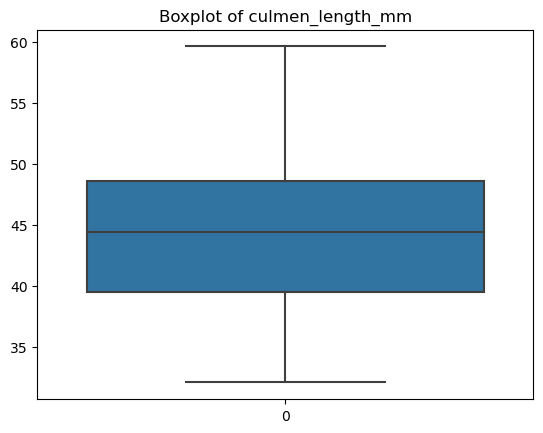

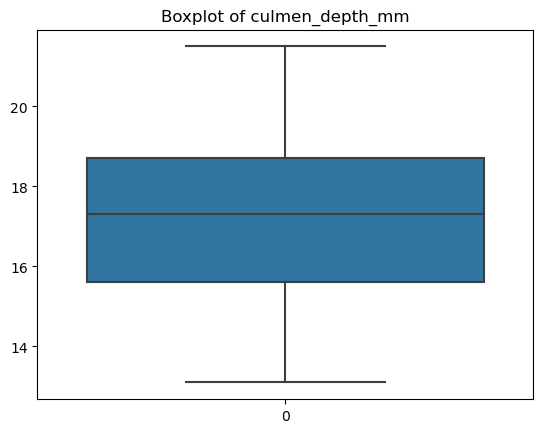

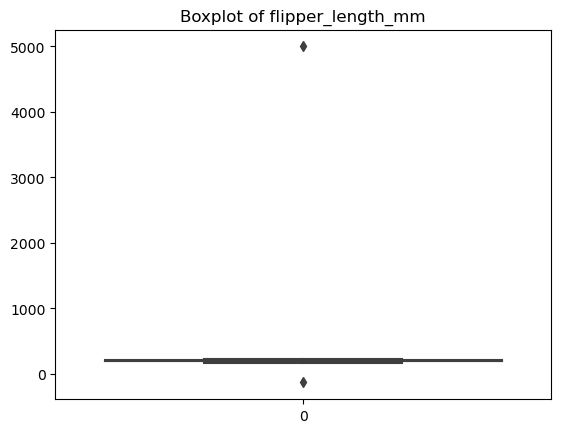

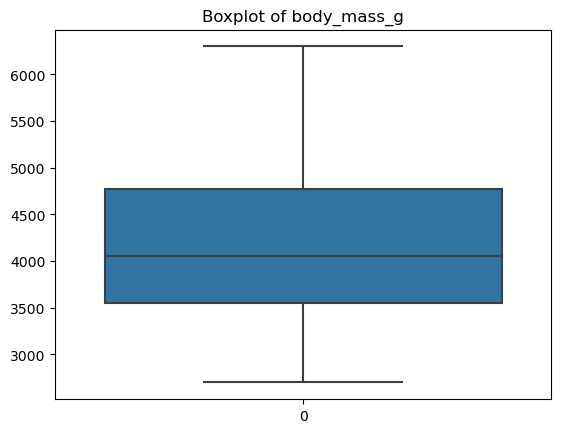

In [36]:
# boxplots
for column in df.select_dtypes(include=['float64']).columns:
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [37]:
print(df[df["flipper_length_mm"] > 4000])
print(df[df["flipper_length_mm"] < 0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


In [38]:
df=df.drop([9, 14])

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()
df['sex']=label_encoder.fit_transform(df['sex'])

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=X, columns=df.columns)

In [42]:
pca = PCA(n_components=2)

pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

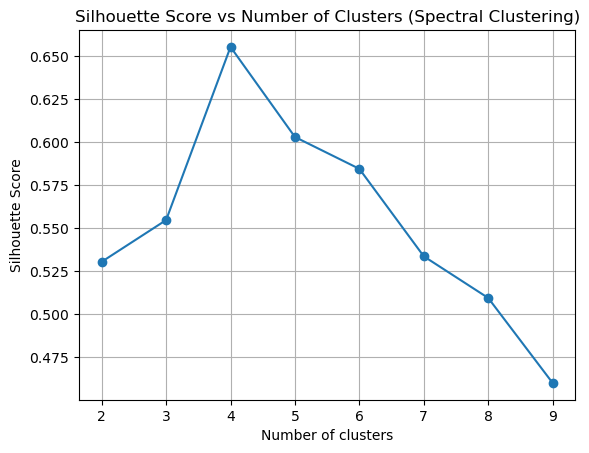

In [43]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    spectral = SpectralClustering(n_clusters=k, random_state=42)
    labels = spectral.fit_predict(df_pca)
    
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Plotting
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (Spectral Clustering)')
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# SpectralClustering model
spectral = SpectralClustering(n_clusters=4, random_state=42)

# Fitting model
spectral.fit(df_pca)

# Evaluating Score
silhouette = silhouette_score(df_pca, spectral.labels_)
calinski_harabasz = calinski_harabasz_score(df_pca, spectral.labels_)
davies_bouldin = davies_bouldin_score(df_pca, spectral.labels_)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.6554730690324767
Calinski-Harabasz Index: 916.403631169708
Davies-Bouldin Index: 0.45495707952834175


C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


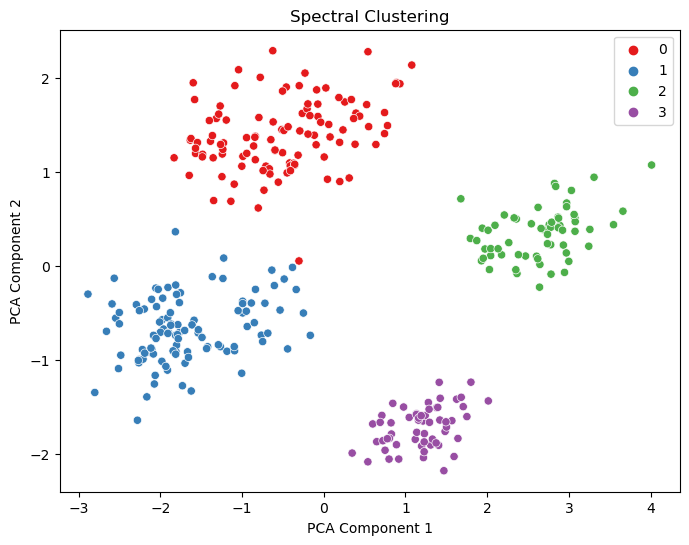

In [46]:
labels = spectral.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='Set1', legend='full')
plt.title('Spectral Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()